# TP 06: Data Science and Machine Learning
This notebook provides solutions for the exercises described in the TP document.

## Exercise 1: Fruits Dataset

In [1]:
# Q1: Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

fruits = pd.read_csv('data_mm06_fruits.csv')
fruits.head()

,etiquette_fruit,nom_fruit,poids,largeur,hauteur,score_couleur
0,2,mandarine,79.76,4.04,4.68,0.76
1,1,pomme,144.64,7.87,5.75,0.47
2,1,pomme,104.17,7.48,8.95,0.56
3,1,pomme,107.53,8.03,6.95,0.62
4,1,pomme,110.17,8.73,8.17,0.62


In [2]:
# Q2: Split the data into training and testing sets
X = fruits[['poids', 'largeur', 'hauteur']]
y = fruits['etiquette_fruit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

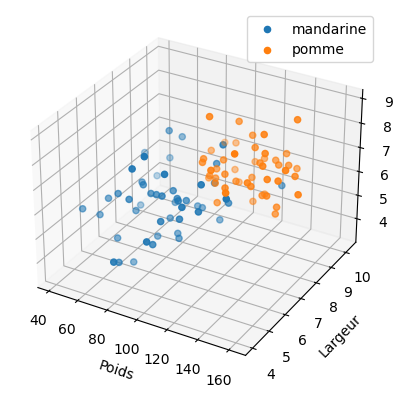

In [3]:
# Q3: Visualize data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for fruit in fruits['nom_fruit'].unique():
    subset = fruits[fruits['nom_fruit'] == fruit]
    ax.scatter(subset['poids'], subset['largeur'], subset['hauteur'], label=fruit)
ax.set_xlabel('Poids')
ax.set_ylabel('Largeur')
ax.set_zlabel('Hauteur')
plt.legend()
plt.show()

In [4]:
# Q4: Train KNN model with k=1 and k=5
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
print('Accuracy with k=1:', knn_1.score(X_test, y_test))

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
print('Accuracy with k=5:', knn_5.score(X_test, y_test))

Accuracy with k=1: 0.85
Accuracy with k=5: 0.85


In [5]:
# Q5: Predict new observation
new_observation = [[20, 4.3, 5.5]]
predicted_fruit = knn_5.predict(new_observation)
print('Predicted fruit:', predicted_fruit)

Predicted fruit: [2]


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Exercise 2: Titanic Dataset

In [6]:
# Q1: Load the dataset
titanic = pd.read_csv('data_mm06_titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Q2.1: Identify columns with missing values
missing_values = titanic.isnull().sum()
print('Missing values per column:', missing_values)

Missing values per column: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Q2.2: Drop the column with the most missing values
titanic = titanic.drop(columns=missing_values.idxmax())

In [9]:
# Q2.3: Replace missing values in a textual column
column_with_few_nulls = 'Embarked'  # Example column
mode_value = titanic[column_with_few_nulls].mode()[0]
titanic[column_with_few_nulls].fillna(mode_value, inplace=True)

In [10]:
# Q2.4: Replace missing ages with median age
median_age = titanic['Age'].median()
titanic['Age'].fillna(median_age, inplace=True)

### Additional Titanic Data Cleaning and Visualizations
_Add cells to process and visualize Titanic data as required._

## Exercise 3: Classification Models

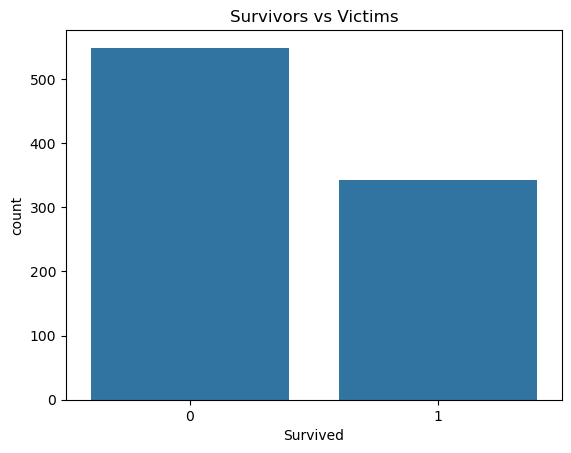

In [11]:
# Q1.1: Plot survivors and victims
import seaborn as sns
sns.countplot(data=titanic, x='Survived')
plt.title('Survivors vs Victims')
plt.show()

In [12]:
# Q2: Split data into training and test sets
from sklearn.model_selection import train_test_split

X = titanic.select_dtypes(include='number').drop(columns=['Survived'])
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Q3: Train logistic regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print('Logistic Regression Accuracy:', log_reg.score(X_test, y_test))

Logistic Regression Accuracy: 0.7238805970149254


Decision Tree Accuracy: 0.6940298507462687


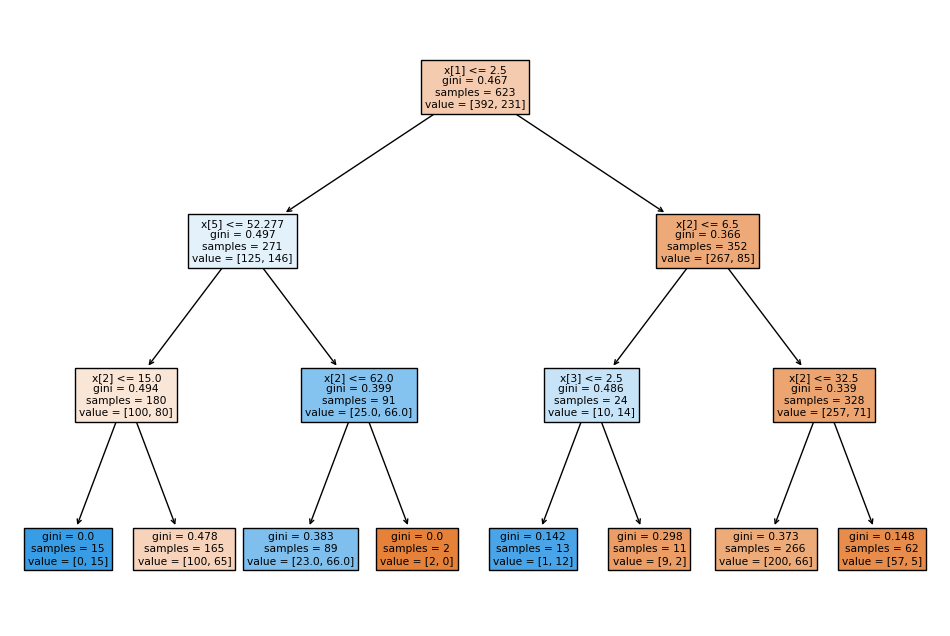

In [14]:
# Q4: Train decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
print('Decision Tree Accuracy:', dt.score(X_test, y_test))

plt.figure(figsize=(12, 8))
tree.plot_tree(dt, filled=True)
plt.show()

In [15]:
# Q5: Train Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)
print('Random Forest Accuracy:', rf.score(X_test, y_test))

Random Forest Accuracy: 0.7238805970149254
